In [53]:
# 기본 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, BatchNormalization, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping

In [3]:
from keras.datasets import cifar10

In [95]:
(X_train_full, y_train_full),(X_test, y_test) = cifar10.load_data()

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

(37500, 32, 32, 3)
(37500, 1)


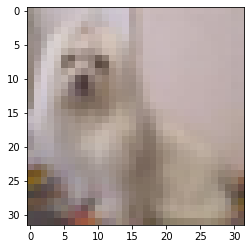

In [97]:
print(X_train.shape)
print(y_train.shape)
plt.imshow(X_train[0])

In [98]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [99]:
cifar_dic = {
    'airplane' : 0,
    'automobile' : 1,
    'bird' : 2,
    'cat' : 3,
    'deer' : 4,
    'dog' : 5,
    'frog' : 6,
    'horse' : 7,
    'ship' : 8,
    'truck' : 9,
}

In [100]:
cifar_dic = { v:k for k,v in cifar_dic.items()}

In [101]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [102]:
input_shape

(32, 32, 3)

In [49]:
model = Sequential(
    [Flatten(input_shape=input_shape),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(output_shape, activation='relu',)]
)

In [50]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)


In [80]:
cifar10_callback = [EarlyStopping(patience=20,restore_best_weights=True),
                    TensorBoard(log_dir='./cifar10_logs')]

model.fit(X_train,
          y_train,
          batch_size=400,
          validation_data=(X_val, y_val),
          callbacks=cifar10_callback
          )

TypeError: 'NoneType' object is not callable

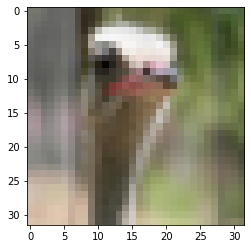

In [52]:
plt.imshow(X_train[1])

- 10x10을 늘리는 방법
    - (32,32,3) => (10,10) => (100,) => (100,3)(3,50) => (100,50)


In [103]:
model = Sequential(
    [
        Conv2D(100,(3,3),activation='relu',input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(50,(2,2),activation='relu'),
        MaxPooling2D((3,3)),
        Conv2D(30,(2,2),activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(output_shape, activation='softmax'),
    ]
)

In [104]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = 'metrics'
model.compile(optimizer=opt,
              loss=loss,
              metrics=metrics)

In [106]:
cifar10_callbacks = [
    keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True),
    keras.callbacks.TensorBoard(log_dir='./logs_cifar10')   # TensorBoard 경로지정
]
model.fit(X_train,
          y_train,
          epochs=20,
          validation_data=(X_val, y_val),
          callbacks=cifar10_callbacks,
          verbose=0)

TypeError: 'NoneType' object is not callable